# DNN: analysis with Keras of 2D data

In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2023-03-06 10:44:41.083059: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 10:44:41.230030: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-06 10:44:41.230045: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-06 10:44:41.932988: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

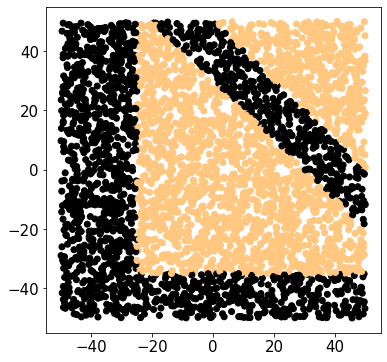

In [3]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [4]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [5]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [6]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

2023-03-06 10:45:05.866075: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-06 10:45:05.866116: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-06 10:45:05.866159: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Legion-5-Pro-16ACH6): /proc/driver/nvidia/version does not exist
2023-03-06 10:45:05.866477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable pa

### Optimization method and cost function

In [7]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [8]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6719 - accuracy: 0.5928 - val_loss: 0.6551 - val_accuracy: 0.6075 - 645ms/epoch - 10ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6203 - accuracy: 0.6941 - val_loss: 0.5889 - val_accuracy: 0.7387 - 79ms/epoch - 1ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5267 - accuracy: 0.7722 - val_loss: 0.4990 - val_accuracy: 0.7763 - 107ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.4514 - accuracy: 0.8103 - val_loss: 0.4400 - val_accuracy: 0.8100 - 118ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.4075 - accuracy: 0.8341 - val_loss: 0.3980 - val_accuracy: 0.8350 - 109ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.3811 - accuracy: 0.8509 - val_loss: 0.3757 - val_accuracy: 0.8525 - 70ms/epoch - 1ms/step
Epoch 7/400
64/64 - 0s - loss: 0.3602 - accuracy: 0.8575 - val_loss: 0.3608 - val_accuracy: 0.8587 - 79ms/epoch - 1ms/step
Epoch 8/400
64/64 - 0s - loss: 0.3483 - accuracy: 0.8603 - val_loss: 0.3522 - val_accuracy: 0.8612 - 90ms/epoch - 1ms/step
Epoch 9/400

Epoch 67/400
64/64 - 0s - loss: 0.2636 - accuracy: 0.8756 - val_loss: 0.2689 - val_accuracy: 0.8712 - 76ms/epoch - 1ms/step
Epoch 68/400
64/64 - 0s - loss: 0.2625 - accuracy: 0.8766 - val_loss: 0.2731 - val_accuracy: 0.8650 - 67ms/epoch - 1ms/step
Epoch 69/400
64/64 - 0s - loss: 0.2660 - accuracy: 0.8731 - val_loss: 0.2734 - val_accuracy: 0.8662 - 71ms/epoch - 1ms/step
Epoch 70/400
64/64 - 0s - loss: 0.2634 - accuracy: 0.8750 - val_loss: 0.2700 - val_accuracy: 0.8700 - 63ms/epoch - 981us/step
Epoch 71/400
64/64 - 0s - loss: 0.2619 - accuracy: 0.8763 - val_loss: 0.2687 - val_accuracy: 0.8725 - 64ms/epoch - 1ms/step
Epoch 72/400
64/64 - 0s - loss: 0.2611 - accuracy: 0.8775 - val_loss: 0.2683 - val_accuracy: 0.8712 - 64ms/epoch - 999us/step
Epoch 73/400
64/64 - 0s - loss: 0.2628 - accuracy: 0.8756 - val_loss: 0.2713 - val_accuracy: 0.8687 - 65ms/epoch - 1ms/step
Epoch 74/400
64/64 - 0s - loss: 0.2624 - accuracy: 0.8775 - val_loss: 0.2747 - val_accuracy: 0.8662 - 70ms/epoch - 1ms/step
Epoc

Epoch 133/400
64/64 - 0s - loss: 0.2592 - accuracy: 0.8772 - val_loss: 0.2715 - val_accuracy: 0.8675 - 88ms/epoch - 1ms/step
Epoch 134/400
64/64 - 0s - loss: 0.2592 - accuracy: 0.8775 - val_loss: 0.2845 - val_accuracy: 0.8650 - 97ms/epoch - 2ms/step
Epoch 135/400
64/64 - 0s - loss: 0.2658 - accuracy: 0.8756 - val_loss: 0.2773 - val_accuracy: 0.8712 - 98ms/epoch - 2ms/step
Epoch 136/400
64/64 - 0s - loss: 0.2651 - accuracy: 0.8741 - val_loss: 0.2722 - val_accuracy: 0.8687 - 83ms/epoch - 1ms/step
Epoch 137/400
64/64 - 0s - loss: 0.2705 - accuracy: 0.8722 - val_loss: 0.3129 - val_accuracy: 0.8587 - 75ms/epoch - 1ms/step
Epoch 138/400
64/64 - 0s - loss: 0.2613 - accuracy: 0.8753 - val_loss: 0.2731 - val_accuracy: 0.8662 - 63ms/epoch - 985us/step
Epoch 139/400
64/64 - 0s - loss: 0.2598 - accuracy: 0.8778 - val_loss: 0.2682 - val_accuracy: 0.8725 - 64ms/epoch - 998us/step
Epoch 140/400
64/64 - 0s - loss: 0.2605 - accuracy: 0.8750 - val_loss: 0.2725 - val_accuracy: 0.8687 - 65ms/epoch - 1ms/s

Epoch 199/400
64/64 - 0s - loss: 0.2569 - accuracy: 0.8784 - val_loss: 0.2690 - val_accuracy: 0.8712 - 85ms/epoch - 1ms/step
Epoch 200/400
64/64 - 0s - loss: 0.2572 - accuracy: 0.8781 - val_loss: 0.2697 - val_accuracy: 0.8687 - 142ms/epoch - 2ms/step
Epoch 201/400
64/64 - 0s - loss: 0.2608 - accuracy: 0.8769 - val_loss: 0.2646 - val_accuracy: 0.8737 - 99ms/epoch - 2ms/step
Epoch 202/400
64/64 - 0s - loss: 0.2583 - accuracy: 0.8781 - val_loss: 0.2719 - val_accuracy: 0.8700 - 129ms/epoch - 2ms/step
Epoch 203/400
64/64 - 0s - loss: 0.2585 - accuracy: 0.8772 - val_loss: 0.2665 - val_accuracy: 0.8737 - 131ms/epoch - 2ms/step
Epoch 204/400
64/64 - 0s - loss: 0.2595 - accuracy: 0.8766 - val_loss: 0.2698 - val_accuracy: 0.8712 - 169ms/epoch - 3ms/step
Epoch 205/400
64/64 - 0s - loss: 0.2594 - accuracy: 0.8772 - val_loss: 0.2650 - val_accuracy: 0.8737 - 149ms/epoch - 2ms/step
Epoch 206/400
64/64 - 0s - loss: 0.2597 - accuracy: 0.8775 - val_loss: 0.2787 - val_accuracy: 0.8675 - 69ms/epoch - 1ms/

Epoch 265/400
64/64 - 0s - loss: 0.2633 - accuracy: 0.8753 - val_loss: 0.2673 - val_accuracy: 0.8712 - 81ms/epoch - 1ms/step
Epoch 266/400
64/64 - 0s - loss: 0.2591 - accuracy: 0.8775 - val_loss: 0.2718 - val_accuracy: 0.8675 - 77ms/epoch - 1ms/step
Epoch 267/400
64/64 - 0s - loss: 0.2596 - accuracy: 0.8772 - val_loss: 0.2769 - val_accuracy: 0.8712 - 74ms/epoch - 1ms/step
Epoch 268/400
64/64 - 0s - loss: 0.2625 - accuracy: 0.8759 - val_loss: 0.2686 - val_accuracy: 0.8687 - 85ms/epoch - 1ms/step
Epoch 269/400
64/64 - 0s - loss: 0.2651 - accuracy: 0.8750 - val_loss: 0.2784 - val_accuracy: 0.8650 - 77ms/epoch - 1ms/step
Epoch 270/400
64/64 - 0s - loss: 0.2602 - accuracy: 0.8769 - val_loss: 0.2822 - val_accuracy: 0.8650 - 77ms/epoch - 1ms/step
Epoch 271/400
64/64 - 0s - loss: 0.2647 - accuracy: 0.8747 - val_loss: 0.2655 - val_accuracy: 0.8712 - 81ms/epoch - 1ms/step
Epoch 272/400
64/64 - 0s - loss: 0.2565 - accuracy: 0.8788 - val_loss: 0.2663 - val_accuracy: 0.8712 - 83ms/epoch - 1ms/step


Epoch 331/400
64/64 - 0s - loss: 0.2578 - accuracy: 0.8781 - val_loss: 0.2664 - val_accuracy: 0.8725 - 79ms/epoch - 1ms/step
Epoch 332/400
64/64 - 0s - loss: 0.2595 - accuracy: 0.8759 - val_loss: 0.2636 - val_accuracy: 0.8750 - 87ms/epoch - 1ms/step
Epoch 333/400
64/64 - 0s - loss: 0.2575 - accuracy: 0.8769 - val_loss: 0.2792 - val_accuracy: 0.8650 - 72ms/epoch - 1ms/step
Epoch 334/400
64/64 - 0s - loss: 0.2624 - accuracy: 0.8744 - val_loss: 0.2679 - val_accuracy: 0.8712 - 77ms/epoch - 1ms/step
Epoch 335/400
64/64 - 0s - loss: 0.2577 - accuracy: 0.8778 - val_loss: 0.2626 - val_accuracy: 0.8725 - 86ms/epoch - 1ms/step
Epoch 336/400
64/64 - 0s - loss: 0.2557 - accuracy: 0.8788 - val_loss: 0.2635 - val_accuracy: 0.8737 - 87ms/epoch - 1ms/step
Epoch 337/400
64/64 - 0s - loss: 0.2559 - accuracy: 0.8791 - val_loss: 0.2702 - val_accuracy: 0.8712 - 79ms/epoch - 1ms/step
Epoch 338/400
64/64 - 0s - loss: 0.2586 - accuracy: 0.8763 - val_loss: 0.2686 - val_accuracy: 0.8700 - 76ms/epoch - 1ms/step


Epoch 397/400
64/64 - 0s - loss: 0.2553 - accuracy: 0.8778 - val_loss: 0.2699 - val_accuracy: 0.8700 - 83ms/epoch - 1ms/step
Epoch 398/400
64/64 - 0s - loss: 0.2578 - accuracy: 0.8784 - val_loss: 0.2646 - val_accuracy: 0.8750 - 81ms/epoch - 1ms/step
Epoch 399/400
64/64 - 0s - loss: 0.2568 - accuracy: 0.8781 - val_loss: 0.2772 - val_accuracy: 0.8675 - 83ms/epoch - 1ms/step
Epoch 400/400
64/64 - 0s - loss: 0.2582 - accuracy: 0.8772 - val_loss: 0.2627 - val_accuracy: 0.8750 - 85ms/epoch - 1ms/step


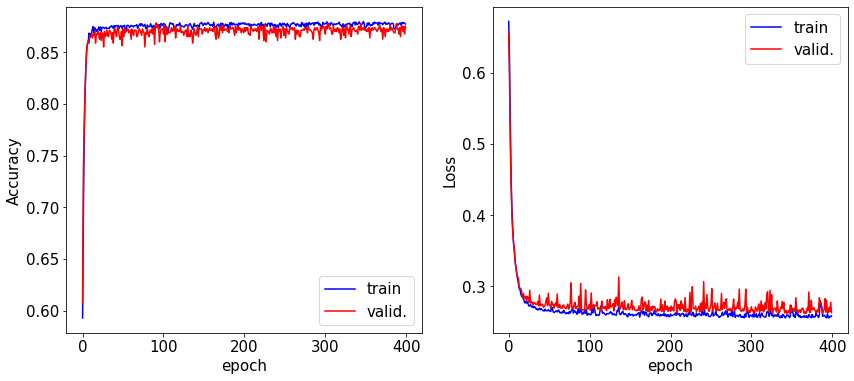

In [9]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [10]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 776us/step


<function matplotlib.pyplot.show(close=None, block=None)>

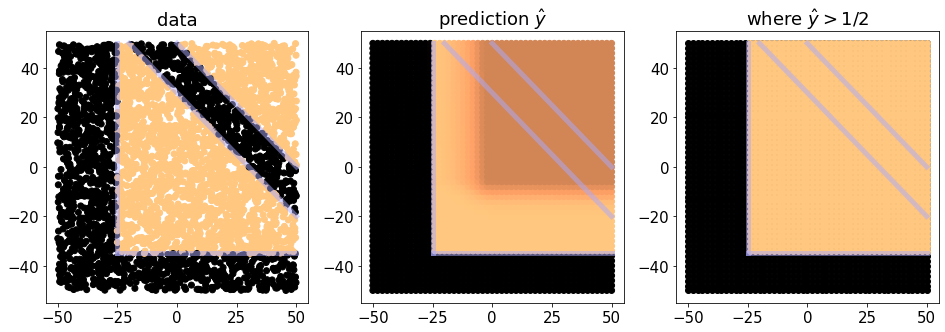

In [11]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show